# Recepie Review and User Feedback Dataset

https://doi.org/10.24432/C5FG95
## Methodology Framework: CRISP-DM & AWS Well-Architected ML
### Framework Synergies
1. **Data Quality & Reliability**:
   - CRISP-DM: Data understanding and preparation
   - AWS: Reliability pillar for robust implementation

2. **Model Development**:
   - CRISP-DM: Modeling and evaluation phases
   - AWS: Performance efficiency and operational excellence

3. **Business Impact**:
   - CRISP-DM: Business understanding and deployment.
   - AWS: Cost optimization and security considerations.

---
### Sections:

 1. [Bussiness Understanding](#1bussiness-understanding).
 2. [Data Understanding](#2data-understanding). 
 3. [Data Preparation](#3data-preparation).
 4. [Modelling](#4-modeling). 
 5. [Evaluation](#5-evaluation). 
 6. Deployment.
---

### 1: Business Understanding

Recipe Review Sentiment Analysis

Business Objective:
- Analyze sentiment from recipe reviews and ratings
- Extract insights about user satisfaction and feedback patterns
- Build predictive model for sentiment classification

Dataset Description:
- Source: Recipe reviews and ratings dataset
- Size: >18,000 reviews
- Key features: User reviews, ratings (1-5 stars), engagement metrics

Success Metrics:
1. Model Performance:
   - Classification accuracy >80%
   - Balanced precision/recall across sentiment classes
2. Business Value:
   - Identify patterns in user satisfaction
   - Extract actionable insights for recipe improvement
   - Understand factors influencing positive/negative reviews


### 2 Data Understanding.

####  2.1 Dependecies.

In [67]:
# Standard Libraries
import os
import json
import pickle
from typing import (
    Dict, 
    List, 
    Tuple, 
    Any
)

# Data Manipulation
import numpy as np
import pandas as pd

# Natural Language Processing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

# NLTK Downloads
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'punkt_tab'])

# Machine Learning
from sklearn.model_selection import (
    train_test_split,
    ParameterGrid
)
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
from sklearn.preprocessing import LabelEncoder

# Deep Learning - Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding,
    LSTM,
    Dense,
    Dropout
)
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ReduceLROnPlateau,
    ModelCheckpoint
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Settings
sns.set_theme(style="whitegrid", palette="dark")

# Optional: Set random seeds for reproducibility
np.random.seed(98)
tf.random.set_seed(98)

[nltk_data] Downloading package punkt to /home/geo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/geo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/geo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/geo/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### 2.2 Load the dataset.

In [35]:
# Define paths
DATA_PATH = "../data/raw/Recipe Reviews and User Feedback Dataset.csv"
PROCESSED_PATH = "../data/processed/Task_3_processed/"
FIGURE_PATH = "../reports/figures/Task_3/"
EVAL_PATH = "../reports/model_evaluations/Task_3/"
MODEL_DIR = "../models/Task_3/"

# Load data
df = pd.read_csv(DATA_PATH)

#### 2.3  Display Basic Information.

In [3]:
# Display basic dataset information
print("Dataset Shape:", df.shape)
print("\nFeature Information:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nFirst few rows:")
display(df.head())
print("\nLast few rows")
display(df.tail())

Dataset Shape: (18182, 15)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB

Missing Values:
Unnamed: 

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...



Last few rows


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


#### 2.4 Basic Statistics.

In [65]:
print("Statistical Summary:")
print(df.describe().T)

# Display value counts for ratings
print("\nRating Distribution:")
print(df['stars'].value_counts().sort_index())

Statistical Summary:
                   count          mean           std           min  \
Unnamed: 0       18182.0  1.214653e+02  1.167479e+02  0.000000e+00   
recipe_number    18182.0  3.868936e+01  2.978665e+01  1.000000e+00   
recipe_code      18182.0  2.177367e+04  2.396511e+04  3.860000e+02   
user_reputation  18182.0  2.159608e+00  1.001467e+01  0.000000e+00   
created_at       18182.0  1.623710e+09  5.468697e+06  1.613035e+09   
reply_count      18182.0  1.462985e-02  1.379740e-01  0.000000e+00   
thumbs_up        18182.0  1.089264e+00  4.201004e+00  0.000000e+00   
thumbs_down      18182.0  5.493345e-01  3.470124e+00  0.000000e+00   
stars            18182.0  4.288802e+00  1.544786e+00  0.000000e+00   
best_score       18182.0  1.531621e+02  1.410753e+02  0.000000e+00   

                          25%           50%           75%           max  
Unnamed: 0       4.500000e+01  9.100000e+01  1.500000e+02  7.240000e+02  
recipe_number    1.200000e+01  3.300000e+01  6.400000e+01  1

#### 2.5 Exploratory Data Analysis.

##### 2.5.1 Star Ratin Distribution.

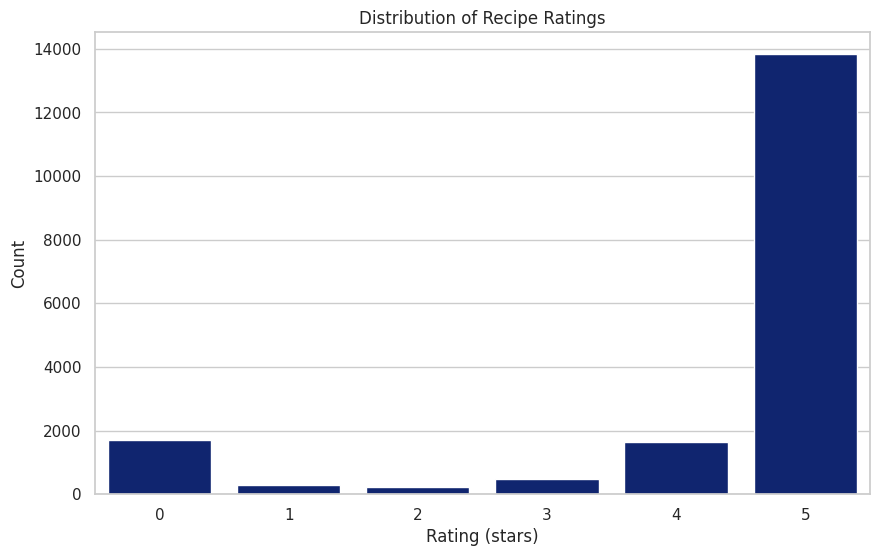

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stars')
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating (stars)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/rating_distribution.png')
plt.show()

##### 2.5.2 Text Analysis

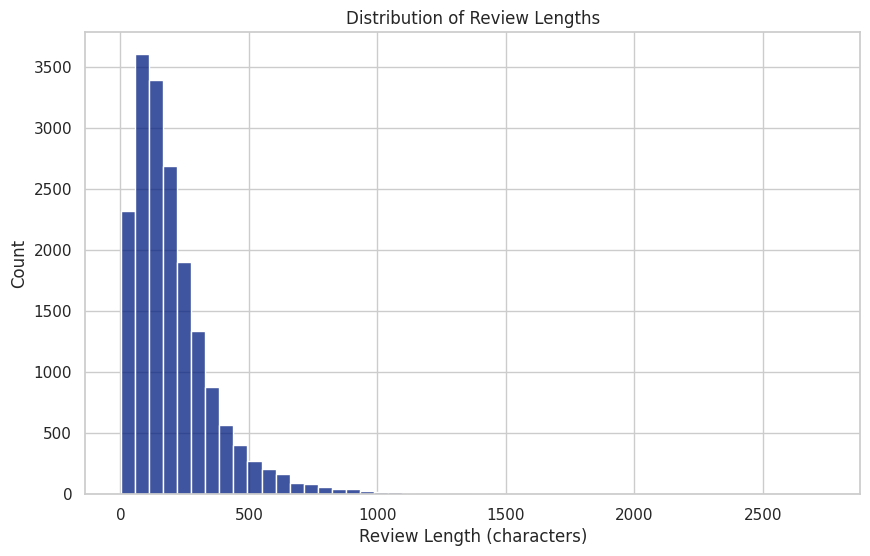


Review Length Statistics:
count    18180.000000
mean       203.909681
std        172.455624
min          1.000000
25%         90.000000
50%        161.000000
75%        266.000000
max       2742.000000
Name: text_length, dtype: float64


In [6]:
# Add text length feature
df['text_length'] = df['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.savefig(f'{FIGURE_PATH}/text_length_distribution.png')
plt.show()

# Print text length statistics
print("\nReview Length Statistics:")
print(df['text_length'].describe())

##### 2.5.3 User Enagament

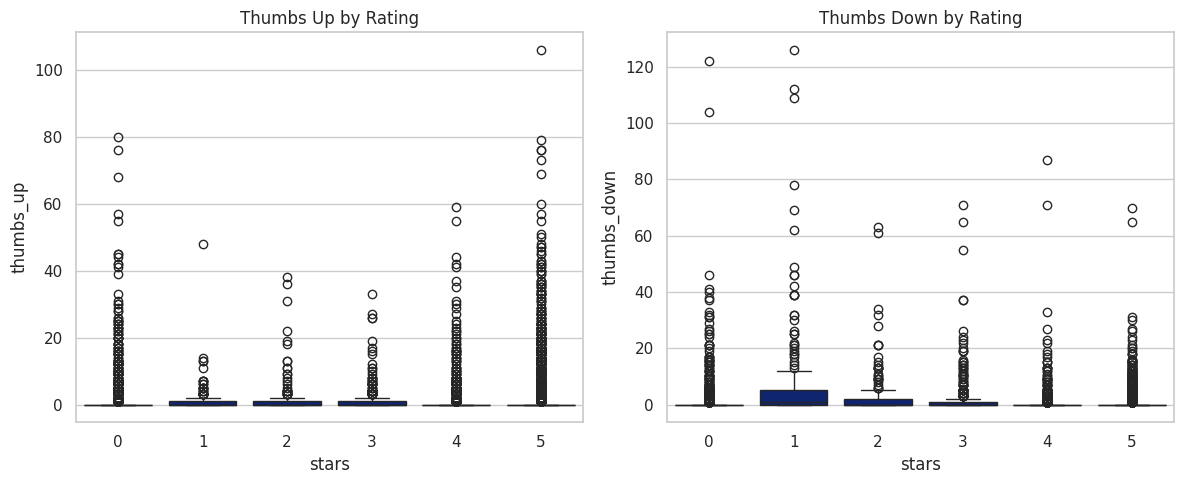

In [7]:
# Create engagement visualization
plt.figure(figsize=(12, 5))

# Thumbs up/down by rating
plt.subplot(121)
sns.boxplot(data=df, x='stars', y='thumbs_up')
plt.title('Thumbs Up by Rating')

plt.subplot(122)
sns.boxplot(data=df, x='stars', y='thumbs_down')
plt.title('Thumbs Down by Rating')

plt.tight_layout()
plt.savefig(f'{FIGURE_PATH}/engagement_by_rating.png')
plt.show()

### 3. Data Preparation
#### 3.1 Data Cleaning and Filtering
- Remove 0 ratings (no feedback)
- Handle missing values in text
- Clean text data (remove special characters, URLs, etc.)

In [ ]:
def clean_and_prepare_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and prepare data for modeling.
    """
    # Remove 0 ratings
    df_cleaned = df[df['stars'] > 0].copy()
    
    # Clean text
    df_cleaned['cleaned_text'] = df_cleaned['text'].apply(lambda x: 
        clean_text(x) if pd.notna(x) else '')
    
    # Convert ratings to sentiment
    df_cleaned['sentiment'] = df_cleaned['stars'].apply(lambda x:
        'negative' if x <= 2
        else 'neutral' if x == 3
        else 'positive'
    )
    
    # Remove empty texts
    df_cleaned = df_cleaned[df_cleaned['cleaned_text'].str.len() > 0]
    
    return df_cleaned

def clean_text(text: str) -> str:
    """
    Clean text data.
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# 3.2 Feature Engineering
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create additional features.
    """
    # Text length features
    df['text_length'] = df['cleaned_text'].str.len()
    df['word_count'] = df['cleaned_text'].str.split().str.len()
    
    # Normalize engagement metrics
    df['normalized_thumbs_up'] = df['thumbs_up'] / df['thumbs_up'].max()
    df['normalized_thumbs_down'] = df['thumbs_down'] / df['thumbs_down'].max()
    
    return df

# 3.3 Text Preprocessing
def preprocess_text(df: pd.DataFrame, max_len: int = 266) -> Tuple[np.ndarray, Tokenizer]:
    """
    Preprocess text for modeling.
    """
    # Initialize tokenizer
    tokenizer = Tokenizer(num_words=10000)  # Based on vocabulary size analysis
    tokenizer.fit_on_texts(df['cleaned_text'])
    
    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['cleaned_text'])
    
    # Pad sequences
    padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')
    
    return padded_sequences, tokenizer

# Execute data preparation
df_cleaned = clean_and_prepare_data(df)
df_features = engineer_features(df_cleaned)
X_padded, tokenizer = preprocess_text(df_features)

# Display class distribution
print("Sentiment Distribution:")
print(df_features['sentiment'].value_counts())
print("\nShape of padded sequences:", X_padded.shape)

# Save processed data
df_features.to_csv(f"{PROCESSED_PATH}/processed_data.csv", index=False)
with open(f"{PROCESSED_PATH}/tokenizer.pkl", 'wb') as f:
    pickle.dump(tokenizer, f)

Sentiment Distribution:
sentiment
positive    15470
negative      512
neutral       489
Name: count, dtype: int64

Shape of padded sequences: (16471, 266)


### 3.2 Feature Engineering
- Convert ratings to sentiment categories:
  * 1-2 stars → Negative
  * 3 stars → Neutral
  * 4-5 stars → Positive
- Create text length features
- Normalize user engagement metrics

In [9]:
# 3.4 Advanced Feature Engineering
def create_advanced_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create advanced features using VADER and additional metrics.
    """
    # Initialize VADER
    sid = SentimentIntensityAnalyzer()
    
    # Add VADER sentiment scores
    df['vader_scores'] = df['cleaned_text'].apply(lambda x: 
        sid.polarity_scores(x))
    df['vader_compound'] = df['vader_scores'].apply(lambda x: x['compound'])
    df['vader_pos'] = df['vader_scores'].apply(lambda x: x['pos'])
    df['vader_neg'] = df['vader_scores'].apply(lambda x: x['neg'])
    
    # User reputation features
    df['is_frequent_reviewer'] = df['user_reputation'] > df['user_reputation'].median()
    
    # Drop intermediate column
    df = df.drop('vader_scores', axis=1)
    
    return df

# 3.5 Handle Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

def balance_dataset(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Balance dataset using SMOTE.
    """
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    print("Original dataset shape:", dict(zip(*np.unique(y, return_counts=True))))
    print("Resampled dataset shape:", dict(zip(*np.unique(y_resampled, return_counts=True))))
    
    return X_resampled, y_resampled

def calculate_class_weights(y: np.ndarray) -> Dict:
    """
    Calculate class weights for balanced model training.
    """
    class_counts = np.bincount(y)
    total = len(y)
    class_weights = {i: total / (len(class_counts) * count) 
                    for i, count in enumerate(class_counts)}
    return class_weights

# 3.6 Final Dataset Preparation
def prepare_final_dataset(df: pd.DataFrame, X_text: np.ndarray) -> Tuple:
    """
    Prepare final dataset for modeling.
    """
    # Prepare features
    numerical_features = ['normalized_thumbs_up', 'normalized_thumbs_down',
                         'vader_compound', 'vader_pos', 'vader_neg',
                         'text_length', 'word_count']
    
    # Scale numerical features
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(df[numerical_features])
    
    # Combine features
    X_combined = np.hstack([X_text, X_numerical])
    
    # Encode target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['sentiment'])
    
    # Split dataset
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_combined, y, test_size=0.3, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Balance training data
    X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)
    
    # Calculate class weights
    class_weights = calculate_class_weights(y_train)
    
    return (X_train_balanced, X_val, X_test,
            y_train_balanced, y_val, y_test,
            class_weights, label_encoder, scaler)

# Execute advanced preparation steps
print("Creating advanced features...")
df_advanced = create_advanced_features(df_features)

print("\nPreparing final dataset...")
(X_train, X_val, X_test,
 y_train, y_val, y_test,
 class_weights, label_encoder, scaler) = prepare_final_dataset(
    df_advanced, X_padded)

# Save processed artifacts
print("\nSaving processed data...")
np.save(f"{PROCESSED_PATH}/X_train.npy", X_train)
np.save(f"{PROCESSED_PATH}/X_val.npy", X_val)
np.save(f"{PROCESSED_PATH}/X_test.npy", X_test)
np.save(f"{PROCESSED_PATH}/y_train.npy", y_train)
np.save(f"{PROCESSED_PATH}/y_val.npy", y_val)
np.save(f"{PROCESSED_PATH}/y_test.npy", y_test)

# Save preprocessing objects
with open(f"{PROCESSED_PATH}/preprocessing_objects.pkl", 'wb') as f:
    pickle.dump({
        'label_encoder': label_encoder,
        'scaler': scaler,
        'class_weights': class_weights
    }, f)

print("\nFeature Summary:")
print(f"Text features shape: {X_padded.shape}")
print(f"Total features: {X_train.shape[1]}")
print("\nClass distribution after balancing:")
print(pd.Series(y_train).value_counts().sort_index())

Creating advanced features...

Preparing final dataset...
Original dataset shape: {np.int64(0): np.int64(359), np.int64(1): np.int64(342), np.int64(2): np.int64(10828)}
Resampled dataset shape: {np.int64(0): np.int64(10828), np.int64(1): np.int64(10828), np.int64(2): np.int64(10828)}

Saving processed data...

Feature Summary:
Text features shape: (16471, 266)
Total features: 273

Class distribution after balancing:
0    10828
1    10828
2    10828
Name: count, dtype: int64


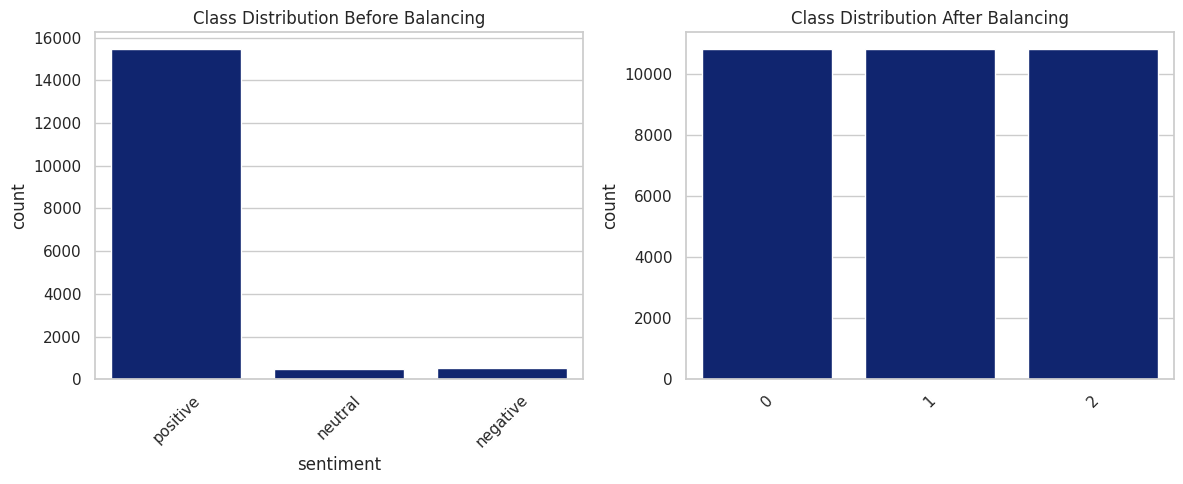

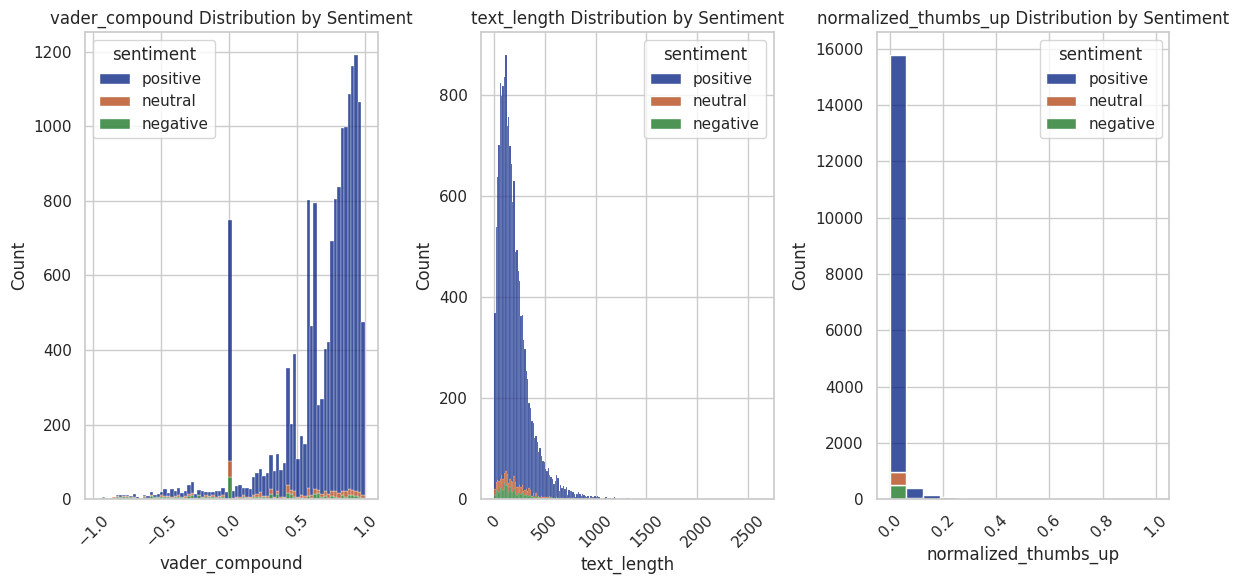

In [10]:
# Visualize class balance before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.countplot(data=df_advanced, x='sentiment')
plt.title('Class Distribution Before Balancing')
plt.xticks(rotation=45)

plt.subplot(122)
sns.countplot(x=y_train)
plt.title('Class Distribution After Balancing')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/class_balance_comparison.png")
plt.show()

# Visualize feature distributions
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['vader_compound', 'text_length', 'normalized_thumbs_up']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df_advanced, x=feature, hue='sentiment', multiple="stack")
    plt.title(f'{feature} Distribution by Sentiment')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f"{FIGURE_PATH}/feature_distributions.png")
plt.show()

### 3.3 Text Preprocessing
- Tokenization
- Remove stopwords
- Handle common recipe-specific terms
- Sequence padding (based on 75th percentile length: 266 characters)

Starting text preprocessing...
Tokenizing texts...
Fitting tokenizer...
Padding sequences to length 266...

Preprocessing Statistics:
vocabulary_size: 14902.00
max_sequence_length: 266.00
average_sequence_length: 18.15
total_unique_words: 14898.00
samples_truncated: 0.00

Saving preprocessing artifacts...


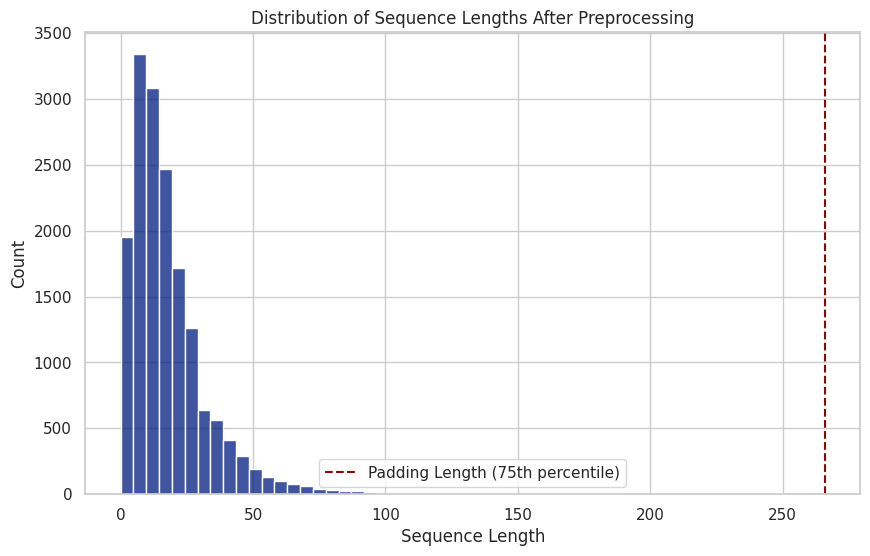


Most common words in the vocabulary:
         word  frequency
0        used       3999
1        good       3315
2   delicious       2903
3       great       2757
4       added       2657
5        easy       2617
6         one       2297
7      family       2285
8         use       2279
9        like       2161
10       also       2146
11      loved       2125
12       love       1781
13       cake       1754
14        add       1730
15    instead       1701
16       soup       1668
17    chicken       1570
18     really       1557
19     cheese       1555


In [11]:
# 3.3 Text Preprocessing
def preprocess_text_data(df: pd.DataFrame, max_length: int = 266) -> Tuple[np.ndarray, Tokenizer, Dict[str, Any]]:
    """
    Comprehensive text preprocessing pipeline.
    
    Args:
        df: DataFrame containing 'cleaned_text' column
        max_length: Maximum sequence length for padding (using 75th percentile)
    
    Returns:
        Tuple containing padded sequences, tokenizer, and preprocessing stats
    """
    print("Starting text preprocessing...")
    
    # 1. Define recipe-specific stopwords
    recipe_stopwords = {
        'recipe', 'recipes', 'cook', 'cooking', 'made', 'make', 'making',
        'food', 'dish', 'meal', 'ingredients', 'kitchen', 'minutes', 'hour',
        'hours', 'time'
    }
    stop_words = set(stopwords.words('english')).union(recipe_stopwords)
    
    # 2. Text cleaning and tokenization
    def clean_and_tokenize(text: str) -> List[str]:
        # Convert to lowercase and remove special characters
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', ' ', text)
        
        # Remove stopwords and recipe-specific terms
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        
        # Remove numeric tokens and single characters
        tokens = [word for word in tokens if not word.isnumeric() and len(word) > 1]
        
        return tokens
    
    # Apply preprocessing to all texts
    print("Tokenizing texts...")
    df['tokenized_text'] = df['cleaned_text'].apply(clean_and_tokenize)
    
    # 3. Initialize and fit tokenizer
    print("Fitting tokenizer...")
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(df['tokenized_text'].apply(' '.join))
    
    # 4. Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(df['tokenized_text'].apply(' '.join))
    
    # 5. Pad sequences
    print(f"Padding sequences to length {max_length}...")
    padded_sequences = pad_sequences(
        sequences,
        maxlen=max_length,
        padding='post',
        truncating='post'
    )
    
    # Collect preprocessing statistics
    stats = {
        'vocabulary_size': len(tokenizer.word_index) + 1,
        'max_sequence_length': max_length,
        'average_sequence_length': np.mean([len(seq) for seq in sequences]),
        'total_unique_words': len(set([word for tokens in df['tokenized_text'] for word in tokens])),
        'samples_truncated': sum(len(seq) > max_length for seq in sequences)
    }
    
    print("\nPreprocessing Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}")
    
    return padded_sequences, tokenizer, stats

# Execute text preprocessing
padded_sequences, tokenizer, preprocessing_stats = preprocess_text_data(df_cleaned)

# Save preprocessing artifacts
print("\nSaving preprocessing artifacts...")
with open(f"{PROCESSED_PATH}/text_preprocessing_artifacts.pkl", 'wb') as f:
    pickle.dump({
        'tokenizer': tokenizer,
        'preprocessing_stats': preprocessing_stats
    }, f)

# Visualize sequence lengths distribution
plt.figure(figsize=(10, 6))
sequence_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(df_cleaned['tokenized_text'].apply(' '.join))]
sns.histplot(sequence_lengths, bins=50)
plt.axvline(x=266, color='r', linestyle='--', label='Padding Length (75th percentile)')
plt.title('Distribution of Sequence Lengths After Preprocessing')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.legend()
plt.savefig(f"{FIGURE_PATH}/sequence_lengths_distribution.png")
plt.show()

# Display most common words
print("\nMost common words in the vocabulary:")
word_freq = pd.DataFrame(
    sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)[:20],
    columns=['word', 'frequency']
)
print(word_freq)

### 4. Modelling

Load the processed data

In [12]:
def load_preprocessed_data(processed_path: str) -> tuple:
    """
    Load preprocessed data and artifacts.
    """
    print("Loading preprocessed data...")
    
    # Load data splits
    X_train = np.load(f"{processed_path}/X_train.npy")
    X_val = np.load(f"{processed_path}/X_val.npy")
    X_test = np.load(f"{processed_path}/X_test.npy")
    y_train = np.load(f"{processed_path}/y_train.npy")
    y_val = np.load(f"{processed_path}/y_val.npy")
    y_test = np.load(f"{processed_path}/y_test.npy")
    
    # Load preprocessing objects
    with open(f"{processed_path}/preprocessing_objects.pkl", 'rb') as f:
        preprocessing_objects = pickle.load(f)
    
    # Load tokenizer and preprocessing stats
    with open(f"{processed_path}/text_preprocessing_artifacts.pkl", 'rb') as f:
        text_preprocessing = pickle.load(f)
    
    preprocessing_stats = {
        'vocabulary_size': len(text_preprocessing['tokenizer'].word_index) + 1,
        'max_sequence_length': X_train.shape[1]
    }
    
    print("\nData shapes:")
    print(f"X_train: {X_train.shape}")
    print(f"X_val: {X_val.shape}")
    print(f"X_test: {X_test.shape}")
    print("\nPreprocessing stats:")
    print(f"Vocabulary size: {preprocessing_stats['vocabulary_size']}")
    print(f"Max sequence length: {preprocessing_stats['max_sequence_length']}")
    
    return (
        X_train, X_val, X_test,
        y_train, y_val, y_test,
        preprocessing_objects,
        text_preprocessing['tokenizer'],
        preprocessing_stats
    )


In [13]:
(
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    preprocessing_objects,
    tokenizer,
    preprocessing_stats
) = load_preprocessed_data(PROCESSED_PATH)

Loading preprocessed data...

Data shapes:
X_train: (32484, 273)
X_val: (2471, 273)
X_test: (2471, 273)

Preprocessing stats:
Vocabulary size: 14902
Max sequence length: 273


#### 4.1 Base LSTM Model

In [14]:
def lstm_model(
    vocab_size: int,
    max_length: int,
    embedding_dim: int = 100,
    lstm_units: int = 128,
    dropout_rate: float = 0.3,
    n_classes: int = 3
) -> tf.keras.Model:
    """
    Create LSTM model for sentiment analysis.
    
    Args:
        vocab_size: Size of vocabulary
        max_length: Maximum sequence length
        embedding_dim: Dimension of embedding layer
        lstm_units: Number of LSTM units
        dropout_rate: Dropout rate for regularization
        n_classes: Number of output classes
    
    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # Embedding Layer
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=max_length
        ),
        
        # First LSTM Layer
        LSTM(
            units=lstm_units,
            return_sequences=True
        ),
        Dropout(dropout_rate),
        
        # Second LSTM Layer
        LSTM(units=lstm_units // 2),
        Dropout(dropout_rate),
        
        # Dense Layers
        Dense(units=64, activation='relu'),
        Dropout(dropout_rate),
        Dense(units=n_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

#### 4.2 Training Configuration

In [15]:
def training_config(
    model_name: str,
    model_dir: str,
    early_stopping_patience: int = 3,
    reduce_lr_patience: int = 2
) -> Dict[str, Any]:
    """
    Create training configuration including callbacks.
    
    Args:
        model_name: Name of the model for saving
        model_dir: Directory to save model checkpoints
        early_stopping_patience: Number of epochs to wait before early stopping
        reduce_lr_patience: Number of epochs to wait before reducing learning rate
    
    Returns:
        Dictionary containing training configuration
    """
    config = {
        'batch_size': 32,
        'epochs': 10,
        'validation_split': 0.2,
        'callbacks': [
            # Early stopping to prevent overfitting
            EarlyStopping(
                monitor='val_loss',
                patience=early_stopping_patience,
                restore_best_weights=True,
                verbose=1
            ),
            
            # Model checkpoint to save best model
            ModelCheckpoint(
                filepath=f'{model_dir}/{model_name}_best.keras',
                monitor='val_loss',
                save_best_only=True,
                verbose=1
            ),
            
            # Reduce learning rate when metrics plateau
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.1,
                patience=reduce_lr_patience,
                min_lr=1e-6,
                verbose=1
            )
        ]
    }
    
    return config

#### 4.3 Training Setup
Configure training parameters and create data splits.

In [16]:
def train_model(
    model: tf.keras.Model,
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    config: Dict[str, Any]
) -> Dict[str, Any]:
    """
    Train the model with given configuration.
    
    Args:
        model: Keras model to train
        X_train: Training features
        y_train: Training labels
        X_val: Validation features
        y_val: Validation labels
        config: Training configuration dictionary
        
    Returns:
        Training history
    """
    print("Starting model training...")
    
    # Train model
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=config['batch_size'],
        epochs=config['epochs'],
        callbacks=config['callbacks'],
        verbose=1
    )
    
    return history.history

#### 4.4 Training Visualization

In [17]:
def plot_training_history(
    history: Dict[str, list],
    figure_path: str
) -> None:
    """
    Visualize training metrics history.
    
    Args:
        history: Training history dictionary
        figure_path: Path to save visualizations
    """
    # Create directory if it doesn't exist
    os.makedirs(figure_path, exist_ok=True)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracy
    ax1.plot(history['accuracy'], label='Training', marker='o')
    ax1.plot(history['val_accuracy'], label='Validation', marker='o')
    ax1.set_title('Model Accuracy Over Time')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)
    
    # Plot loss
    ax2.plot(history['loss'], label='Training', marker='o')
    ax2.plot(history['val_loss'], label='Validation', marker='o')
    ax2.set_title('Model Loss Over Time')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    # Save and close
    plt.tight_layout()
    plt.savefig(f'{figure_path}/training_history.png')
    plt.close()
    
    # Print training summary
    print("\nTraining Summary:")
    print("-" * 50)
    print(f"Final Training Accuracy: {history['accuracy'][-1]:.4f}")
    print(f"Final Validation Accuracy: {history['val_accuracy'][-1]:.4f}")
    print(f"Final Training Loss: {history['loss'][-1]:.4f}")
    print(f"Final Validation Loss: {history['val_loss'][-1]:.4f}")
    
    # Plot learning rate if available
    if 'lr' in history:
        plt.figure(figsize=(10, 5))
        plt.plot(history['lr'], marker='o')
        plt.title('Learning Rate Over Time')
        plt.xlabel('Epoch')
        plt.ylabel('Learning Rate')
        plt.grid(True)
        plt.savefig(f'{figure_path}/learning_rate.png')
        plt.close()

#### 4.5 Model Training

In [18]:
# Create all necessary directories
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(FIGURE_PATH, exist_ok=True)
os.makedirs(f"{FIGURE_PATH}/base_model", exist_ok=True)

# Create base model
print("Creating base LSTM model...")
base_model = lstm_model(
    vocab_size=preprocessing_stats['vocabulary_size'],
    max_length=preprocessing_stats['max_sequence_length'],
    embedding_dim=100,
    lstm_units=128,
    dropout_rate=0.3
)

# Display model summary
print("\nModel Architecture:")
base_model.summary()

# Create training configuration
print("\nSetting up training configuration...")
base_config = training_config(
    model_name="base_model",
    model_dir=MODEL_DIR
)

# Train the model
print("\nStarting base model training...")
base_history = train_model(
    base_model,
    X_train,
    y_train,
    X_val,
    y_val,
    base_config
)

# Visualize training results
print("\nGenerating training visualizations...")
plot_training_history(
    base_history,
    figure_path=f"{FIGURE_PATH}/base_model"
)

# Save base model
print("\nSaving base model...")
base_model.save(f'{MODEL_DIR}/base_model.keras')

# Save training history
with open(f'{MODEL_DIR}/base_model_history.json', 'w') as f:
    json.dump(base_history, f, indent=2)

print("\nBase model training completed!")
print(f"Model saved to: {MODEL_DIR}/base_model.keras")
print(f"Training visualizations saved to: {FIGURE_PATH}/base_model")

Creating base LSTM model...


/mnt/c/Users/geova/projects/tfgpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Model Architecture:


I0000 00:00:1731952002.987835   85825 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6073 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Setting up training configuration...

Starting base model training...
Starting model training...
Epoch 1/10


I0000 00:00:1731952012.242353   86788 cuda_dnn.cc:529] Loaded cuDNN version 90300


1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4863 - loss: 1.0092
Epoch 1: val_loss improved from inf to 0.87623, saving model to ../models/Task_3//base_model_best.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 58s 45ms/step - accuracy: 0.4863 - loss: 1.0092 - val_accuracy: 0.8401 - val_loss: 0.8762 - learning_rate: 0.0010
Epoch 2/10
1015/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5348 - loss: 0.9509
Epoch 2: val_loss improved from 0.87623 to 0.81118, saving model to ../models/Task_3//base_model_best.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.5348 - loss: 0.9508 - val_accuracy: 0.8478 - val_loss: 0.8112 - learning_rate: 0.0010
Epoch 3/10
1015/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5363 - loss: 0.9404
Epoch 3: val_loss improved from 0.81118 to 0.78632, saving model to ../models/Task_3//base_model_best.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 47s 47ms/step - accuracy: 0.5363 - loss: 0.9404 - val_accuracy: 0.8478 - val_loss: 0.7863 - learning_ra

#### 4.6 Hyperparameter Tunning


In [19]:
def create_parameter_grid() -> Dict[str, List]:
    """
    Create grid of hyperparameters to search.
    Returns a dictionary with lists of parameter values.
    """
    return {
        'embedding_dim': [100, 200],     # Embedding layer dimensions
        'lstm_units': [64, 128],         # Number of LSTM units
        'dropout_rate': [0.2, 0.3],      # Dropout rate for regularization
        'batch_size': [32, 64],          # Training batch size
        'learning_rate': [1e-3, 1e-4]    # Learning rate
    }

In [20]:
def train_with_params(
    params: Dict[str, Any],
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    vocab_size: int,
    max_length: int,
    model_dir: str,
    combination_number: int
) -> Dict[str, Any]:
    """
    Train model with specific hyperparameters.
    """
    print(f"\nTraining Combination {combination_number}")
    print(f"Parameters:\n{json.dumps(params, indent=2)}")
    
    # Create model
    model = lstm_model(
        vocab_size=vocab_size,
        max_length=max_length,
        embedding_dim=params['embedding_dim'],
        lstm_units=params['lstm_units'],
        dropout_rate=params['dropout_rate']
    )
    
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Setup training configuration
    config = training_config(
        model_name=f"tuning_combination_{combination_number}",
        model_dir=model_dir
    )
    config['batch_size'] = params['batch_size']
    
    # Train model
    history = train_model(
        model,
        X_train,
        y_train,
        X_val,
        y_val,
        config
    )
    
    # Get best results
    best_epoch = np.argmin(history['val_loss'])
    results = {
        'parameters': params,
        'best_val_loss': float(history['val_loss'][best_epoch]),
        'best_val_accuracy': float(history['val_accuracy'][best_epoch]),
        'best_epoch': int(best_epoch) + 1,
        'combination': combination_number
    }
    
    # Save combination results
    save_path = f"{model_dir}/combination_{combination_number}_results.json"
    with open(save_path, 'w') as f:
        json.dump(results, f, indent=2)
    
    return results

In [21]:
def run_hyperparameter_search(
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    vocab_size: int,
    max_length: int,
    model_dir: str,
    results_dir: str
) -> Dict[str, Any]:
    """
    Run hyperparameter search process.
    """
    # Create directories
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(results_dir, exist_ok=True)
    
    # Get parameter grid
    params = create_parameter_grid()
    grid = list(ParameterGrid(params))
    print(f"Starting hyperparameter search with {len(grid)} combinations...")
    
    # Initialize results storage
    all_results = []
    best_result = None
    
    # Create log file
    log_file = f"{results_dir}/tuning_log.txt"
    with open(log_file, 'w') as f:
        f.write(f"Hyperparameter Tuning Log\n")
        f.write(f"Started at: {pd.Timestamp.now()}\n")
        f.write("=" * 50 + "\n\n")
    
    # Run hyperparameter search
    for i, params in enumerate(grid, 1):
        try:
            # Log start of combination
            with open(log_file, 'a') as f:
                f.write(f"\nCombination {i}/{len(grid)}\n")
                f.write(f"Parameters: {json.dumps(params, indent=2)}\n")
            
            # Train model with current parameters
            result = train_with_params(
                params,
                X_train,
                y_train,
                X_val,
                y_val,
                vocab_size,
                max_length,
                model_dir,
                i
            )
            
            all_results.append(result)
            
            # Update best result
            if best_result is None or result['best_val_loss'] < best_result['best_val_loss']:
                best_result = result
            
            # Log results
            with open(log_file, 'a') as f:
                f.write(f"Val Loss: {result['best_val_loss']:.4f}\n")
                f.write(f"Val Accuracy: {result['best_val_accuracy']:.4f}\n")
                f.write("-" * 50 + "\n")
            
        except Exception as e:
            print(f"Error with combination {i}: {str(e)}")
            with open(log_file, 'a') as f:
                f.write(f"Error: {str(e)}\n")
                f.write("-" * 50 + "\n")
    
    # Save final results
    final_results = {
        'best_result': best_result,
        'all_results': all_results,
        'param_grid': params,
        'total_combinations': len(grid)
    }
    
    with open(f"{results_dir}/final_results.json", 'w') as f:
        json.dump(final_results, f, indent=2)
    
    print("\nHyperparameter Search Completed!")
    print(f"\nBest Configuration (Combination {best_result['combination']}):")
    print(f"Parameters: {json.dumps(best_result['parameters'], indent=2)}")
    print(f"Validation Loss: {best_result['best_val_loss']:.4f}")
    print(f"Validation Accuracy: {best_result['best_val_accuracy']:.4f}")
    
    return final_results

In [22]:
TUNING_MODEL_DIR = f"{MODEL_DIR}/tuning_models"
TUNING_RESULTS_DIR = f"{MODEL_DIR}/tuning_results"

# Show parameter grid
params = create_parameter_grid()
print("\nHyperparameter Search Space:")
for param, values in params.items():
    print(f"{param}: {values}")
print(f"\nTotal combinations: {len(list(ParameterGrid(params)))}")

# Ask for confirmation
print(f"\nResults will be saved in: {TUNING_RESULTS_DIR}")



Hyperparameter Search Space:
embedding_dim: [100, 200]
lstm_units: [64, 128]
dropout_rate: [0.2, 0.3]
batch_size: [32, 64]
learning_rate: [0.001, 0.0001]

Total combinations: 32

Results will be saved in: ../models/Task_3//tuning_results


In [24]:
tuning_results = run_hyperparameter_search(
        X_train,
        y_train,
        X_val,
        y_val,
        vocab_size=preprocessing_stats['vocabulary_size'],
        max_length=preprocessing_stats['max_sequence_length'],
        model_dir=TUNING_MODEL_DIR,
        results_dir=TUNING_RESULTS_DIR
    )

Starting hyperparameter search with 32 combinations...

Training Combination 1
Parameters:
{
  "batch_size": 32,
  "dropout_rate": 0.2,
  "embedding_dim": 100,
  "learning_rate": 0.001,
  "lstm_units": 64
}
Starting model training...
Epoch 1/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4843 - loss: 1.0072
Epoch 1: val_loss improved from inf to 0.85622, saving model to ../models/Task_3//tuning_models/tuning_combination_1_best.keras
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.4844 - loss: 1.0071 - val_accuracy: 0.8430 - val_loss: 0.8562 - learning_rate: 0.0010
Epoch 2/10
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5295 - loss: 0.9523
Epoch 2: val_loss did not improve from 0.85622
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.5295 - loss: 0.9523 - val_accuracy: 0.8503 - val_loss: 0.8678 - learning_rate: 0.0010
Epoch 3/10
1015/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5372 - loss: 0.9385
Epoch 3: val_loss did not improve 

#### 4.7 Hyperparameter Results

In [25]:
def plot_tuning_results(results_dir: str, figure_path: str) -> None:
    """
    Create visualizations for hyperparameter tuning results.
    
    Args:
        results_dir: Directory containing the tuning results
        figure_path: Directory to save the plots
    """
    # Load results
    with open(f"{results_dir}/final_results.json", 'r') as f:
        results = json.load(f)
    
    # Convert results to DataFrame
    df_results = pd.DataFrame([
        {
            **result['parameters'],
            'val_loss': result['best_val_loss'],
            'val_accuracy': result['best_val_accuracy'],
            'combination': result['combination']
        }
        for result in results['all_results']
    ])
    
    # 1. Overall Performance Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(df_results['combination'], df_results['val_loss'], 
             'b.-', label='Validation Loss')
    plt.xlabel('Combination Number')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss Across Combinations')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df_results['combination'], df_results['val_accuracy'], 
             'r.-', label='Validation Accuracy')
    plt.xlabel('Combination Number')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy Across Combinations')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{figure_path}/tuning_overall_performance.png')
    plt.close()

    # 2. Parameter Impact Analysis
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    params = ['embedding_dim', 'lstm_units', 'dropout_rate', 
              'batch_size', 'learning_rate']
    
    for i, param in enumerate(params):
        sns.boxplot(data=df_results, x=param, y='val_loss', ax=axes[i])
        axes[i].set_title(f'Impact of {param} on Validation Loss')
        axes[i].set_xlabel(param)
        axes[i].set_ylabel('Validation Loss')
        if param == 'learning_rate':
            axes[i].set_xticklabels([f'{x:.0e}' for x in df_results[param].unique()])
    
    # Remove empty subplot
    axes[-1].remove()
    
    plt.tight_layout()
    plt.savefig(f'{figure_path}/parameter_impact.png')
    plt.close()

    # 3. Top Configurations Performance
    top_k = min(5, len(df_results))
    top_configs = df_results.nsmallest(top_k, 'val_loss')
    
    plt.figure(figsize=(12, 6))
    x = range(top_k)
    width = 0.35
    
    plt.bar([i - width/2 for i in x], top_configs['val_loss'], 
            width, label='Validation Loss', color='blue', alpha=0.7)
    plt.bar([i + width/2 for i in x], top_configs['val_accuracy'], 
            width, label='Validation Accuracy', color='red', alpha=0.7)
    
    plt.xlabel('Configuration Rank')
    plt.ylabel('Score')
    plt.title('Top Configurations Performance')
    plt.xticks(x, [f'#{int(i)}' for i in top_configs['combination']])
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{figure_path}/top_configurations.png')
    plt.close()

    # Print analysis summary
    print("\nHyperparameter Tuning Analysis")
    print("=" * 50)
    
    print("\nOverall Performance:")
    print(f"Best Validation Loss: {df_results['val_loss'].min():.4f}")
    print(f"Best Validation Accuracy: {df_results['val_accuracy'].max():.4f}")
    print(f"Mean Validation Loss: {df_results['val_loss'].mean():.4f}")
    print(f"Std Validation Loss: {df_results['val_loss'].std():.4f}")
    
    print("\nBest Configuration:")
    best_config = df_results.loc[df_results['val_loss'].idxmin()]
    for param in params:
        print(f"{param}: {best_config[param]}")
    
    print("\nParameter Impact Analysis:")
    for param in params:
        mean_loss = df_results.groupby(param)['val_loss'].mean()
        print(f"\n{param}:")
        for value, loss in mean_loss.items():
            print(f"  Value {value}: Mean Loss = {loss:.4f}")

# Run the visualization
plot_tuning_results(
    results_dir=TUNING_RESULTS_DIR,
    figure_path=FIGURE_PATH
)

/tmp/ipykernel_85825/2957278381.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels([f'{x:.0e}' for x in df_results[param].unique()])



Hyperparameter Tuning Analysis

Overall Performance:
Best Validation Loss: 0.6048
Best Validation Accuracy: 0.9352
Mean Validation Loss: 0.8189
Std Validation Loss: 0.0540

Best Configuration:
embedding_dim: 100.0
lstm_units: 128.0
dropout_rate: 0.2
batch_size: 64.0
learning_rate: 0.001

Parameter Impact Analysis:

embedding_dim:
  Value 100: Mean Loss = 0.8093
  Value 200: Mean Loss = 0.8285

lstm_units:
  Value 64: Mean Loss = 0.8299
  Value 128: Mean Loss = 0.8079

dropout_rate:
  Value 0.2: Mean Loss = 0.8042
  Value 0.3: Mean Loss = 0.8335

batch_size:
  Value 32: Mean Loss = 0.8304
  Value 64: Mean Loss = 0.8074

learning_rate:
  Value 0.0001: Mean Loss = 0.8486
  Value 0.001: Mean Loss = 0.7891


#### 4.8 Trained Tunned LSTM Model

In [26]:
def create_tuned_lstm(
    vocab_size: int,
    max_length: int,
    embedding_dim: int = 100,
    lstm_units: int = 128,
    dropout_rate: float = 0.2
) -> tf.keras.Model:
    """
    Create LSTM model with tuned hyperparameters.
    """
    model = Sequential([
        # Embedding Layer
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=max_length
        ),
        
        # First LSTM Layer
        LSTM(
            units=lstm_units,
            return_sequences=True
        ),
        Dropout(dropout_rate),
        
        # Second LSTM Layer
        LSTM(units=lstm_units // 2),
        Dropout(dropout_rate),
        
        # Dense Layers
        Dense(units=64, activation='relu'),
        Dropout(dropout_rate),
        Dense(units=3, activation='softmax')
    ])
    
    # Compile model with tuned learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train tuned model
def train_tuned_model(
    X_train: np.ndarray,
    y_train: np.ndarray,
    X_val: np.ndarray,
    y_val: np.ndarray,
    vocab_size: int,
    max_length: int,
    model_dir: str
) -> Tuple[tf.keras.Model, Dict[str, Any]]:
    """
    Train LSTM model with tuned hyperparameters.
    """
    print("Creating tuned LSTM model...")
    
    # Create model
    tuned_model = create_tuned_lstm(
        vocab_size=vocab_size,
        max_length=max_length
    )
    
    # Display model summary
    tuned_model.summary()
    
    # Create training configuration
    tuned_config = training_config(
        model_name="lstm_tuned",
        model_dir=model_dir,
        early_stopping_patience=5,  # Increased patience for final model
        reduce_lr_patience=3
    )
    tuned_config['batch_size'] = 64  # Best batch size from tuning
    
    print("\nTraining tuned model...")
    # Train model
    history = train_model(
        tuned_model,
        X_train,
        y_train,
        X_val,
        y_val,
        tuned_config
    )
    
    # Save model
    model_path = f"{model_dir}/lstm_tuned_final.keras"
    tuned_model.save(model_path)
    print(f"\nTuned model saved to: {model_path}")
    
    # Save training history
    history_path = f"{model_dir}/lstm_tuned_history.json"
    with open(history_path, 'w') as f:
        json.dump(history, f, indent=2)
    print(f"Training history saved to: {history_path}")
    
    return tuned_model, history

# Train and visualize
print("Starting tuned model training pipeline...")

tuned_model, tuned_history = train_tuned_model(
    X_train,
    y_train,
    X_val,
    y_val,
    vocab_size=preprocessing_stats['vocabulary_size'],
    max_length=preprocessing_stats['max_sequence_length'],
    model_dir=MODEL_DIR
)

# Plot training history
print("\nGenerating training visualizations...")
plot_training_history(
    tuned_history,
    figure_path=f"{FIGURE_PATH}/tuned_model"
)

print("\nTuned model training completed!")

Starting tuned model training pipeline...
Creating tuned LSTM model...


/mnt/c/Users/geova/projects/tfgpu/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_66 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training tuned model...
Starting model training...
Epoch 1/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4751 - loss: 1.0134
Epoch 1: val_loss improved from inf to 0.87270, saving model to ../models/Task_3//lstm_tuned_best.keras
508/508 ━━━━━━━━━━━━━━━━━━━━ 27s 49ms/step - accuracy: 0.4752 - loss: 1.0133 - val_accuracy: 0.8365 - val_loss: 0.8727 - learning_rate: 0.0010
Epoch 2/10
507/508 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5300 - loss: 0.9521
Epoch 2: val_loss improved from 0.87270 to 0.79979, saving model to ../models/Task_3//lstm_tuned_best.keras
508/508 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.5300 - loss: 0.9521 - val_accuracy: 0.8474 - val_loss: 0.7998 - learning_rate: 0.0010
Epoch 3/10
508/508 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5372 - loss: 0.9463
Epoch 3: val_loss did not improve from 0.79979
508/508 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.5372 - loss: 0.9462 - val_accuracy: 0.8422 - val_loss: 0.8985 - learning_rate: 0.0010

### 5 Model Evaluation

In [42]:
def load_models_and_histories() -> Tuple[Dict[str, Any], Dict[str, Any]]:
    """
    Load trained models and their histories.
    """
    models = {}
    histories = {}
    
    # Define file paths
    model_files = {
        'base': {
            'model': f"{MODEL_DIR}/base_model.keras",
            'history': f"{MODEL_DIR}/base_model_history.json"
        },
        'tuned': {
            'model': f"{MODEL_DIR}/lstm_tuned_final.keras",
            'history': f"{MODEL_DIR}/lstm_tuned_history.json"
        }
    }
    
    # Load models and histories
    for model_type, paths in model_files.items():
        try:
            # Load model
            print(f"\nLoading {model_type} model from: {paths['model']}")
            models[model_type] = tf.keras.models.load_model(paths['model'])
            
            # Load history
            print(f"Loading {model_type} history from: {paths['history']}")
            with open(paths['history'], 'r') as f:
                histories[model_type] = json.load(f)
                
        except FileNotFoundError as e:
            print(f"\nError loading {model_type} model/history: {str(e)}")
            print(f"Please ensure the following files exist:")
            print(f"- Model: {paths['model']}")
            print(f"- History: {paths['history']}")
            raise
    
    return models, histories

# Let's verify the file paths first
print("Checking model and history files...")
for model_type in ['base', 'tuned']:
    print(f"\n{model_type.capitalize()} Model:")
    print(f"Model path: {MODEL_DIR}/{model_type}_model.keras")
    print(f"History path: {MODEL_DIR}/{model_type}_model_history.json")
    
print("\nModel directory contents:")
try:
    files = os.listdir(MODEL_DIR)
    for f in files:
        print(f"- {f}")
except Exception as e:
    print(f"Error listing directory: {str(e)}")

Checking model and history files...

Base Model:
Model path: ../models/Task_3//base_model.keras
History path: ../models/Task_3//base_model_history.json

Tuned Model:
Model path: ../models/Task_3//tuned_model.keras
History path: ../models/Task_3//tuned_model_history.json

Model directory contents:
- lstm_tuned_best.keras
- tuning_models
- tuning_results
- hyperparameter_results.json
- tuning
- base_model.keras
- hyperparameter_tuning
- base_model_best.keras
- lstm_tuned_history.json
- lstm_tuned_final.keras
- base_model_history.json


In [44]:

from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


def evaluate_model_performance(
    model: tf.keras.Model,
    X_test: np.ndarray,
    y_test: np.ndarray,
    model_name: str
) -> Dict[str, Any]:
    """
    Evaluate model performance on test set.
    
    Args:
        model: Trained model
        X_test: Test features
        y_test: Test labels
        model_name: Name of the model for logging
        
    Returns:
        Dictionary containing evaluation metrics
    """
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred_classes),
        'precision': precision_score(y_test, y_pred_classes, average='weighted'),
        'recall': recall_score(y_test, y_pred_classes, average='weighted'),
        'f1': f1_score(y_test, y_pred_classes, average='weighted'),
        'confusion_matrix': confusion_matrix(y_test, y_pred_classes).tolist(),
        'classification_report': classification_report(y_test, y_pred_classes)
    }
    
    # Print results
    print(f"\nEvaluation Results for {model_name} Model:")
    print("-" * 50)
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print("\nClassification Report:")
    print(metrics['classification_report'])
    
    return metrics

In [45]:
def compare_training_histories(
    histories: Dict[str, Any],
    figure_path: str
) -> None:
    """
    Compare and visualize training histories of different models.
    
    Args:
        histories: Dictionary containing training histories
        figure_path: Path to save figures
    """
    # Plot training curves comparison
    plt.figure(figsize=(15, 5))
    
    # Accuracy comparison
    plt.subplot(1, 2, 1)
    for model_type, history in histories.items():
        plt.plot(history['accuracy'], label=f'{model_type.capitalize()} (Train)')
        plt.plot(history['val_accuracy'], label=f'{model_type.capitalize()} (Val)')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Loss comparison
    plt.subplot(1, 2, 2)
    for model_type, history in histories.items():
        plt.plot(history['loss'], label=f'{model_type.capitalize()} (Train)')
        plt.plot(history['val_loss'], label=f'{model_type.capitalize()} (Val)')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'{figure_path}/model_comparison.png')
    plt.show()
    plt.close()

In [46]:
def visualize_confusion_matrices(
    metrics: Dict[str, Dict],
    figure_path: str
) -> None:
    """
    Visualize confusion matrices for different models.
    
    Args:
        metrics: Dictionary containing evaluation metrics for each model
        figure_path: Path to save figures
    """
    plt.figure(figsize=(15, 5))
    
    for i, (model_name, model_metrics) in enumerate(metrics.items(), 1):
        plt.subplot(1, 2, i)
        cm = np.array(model_metrics['confusion_matrix'])
        
        # Create normalized confusion matrix
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_norm, annot=cm, fmt='d', cmap='Blues',
                   xticklabels=['Negative', 'Neutral', 'Positive'],
                   yticklabels=['Negative', 'Neutral', 'Positive'])
        plt.title(f'{model_name.capitalize()} Model\nConfusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
    
    plt.tight_layout()
    plt.savefig(f'{figure_path}/confusion_matrices.png')
    plt.show()
    plt.close()

In [47]:

def generate_evaluation_report(
    metrics: Dict[str, Dict],
    figure_path: str
) -> None:
    """
    Generate comprehensive evaluation report.
    
    Args:
        metrics: Dictionary containing evaluation metrics for each model
        figure_path: Path to save report
    """
    report = []
    report.append("Model Evaluation Report")
    report.append("=" * 50)
    
    # Compare metrics
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        report.append(f"\n{metric.capitalize()} Comparison:")
        for model_name, model_metrics in metrics.items():
            report.append(f"{model_name.capitalize()} Model: {model_metrics[metric]:.4f}")
    
    # Add classification reports
    for model_name, model_metrics in metrics.items():
        report.append(f"\n{model_name.capitalize()} Model Classification Report:")
        report.append("-" * 50)
        report.append(model_metrics['classification_report'])
    
    # Save report
    with open(f'{figure_path}/evaluation_report.txt', 'w') as f:
        f.write('\n'.join(report))
    
    print("\nEvaluation report generated successfully!")
    print(f"Report saved to: {figure_path}/evaluation_report.txt")

Loading models and training histories...

Loading base model from: ../models/Task_3//base_model.keras
Loading base history from: ../models/Task_3//base_model_history.json

Loading tuned model from: ../models/Task_3//lstm_tuned_final.keras
Loading tuned history from: ../models/Task_3//lstm_tuned_history.json

Evaluating models on test set...
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

Evaluation Results for base Model:
--------------------------------------------------
Accuracy: 0.8341
Precision: 0.9136
Recall: 0.8341
F1 Score: 0.8694

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.45      0.30        77
           1       0.05      0.16      0.08        73
           2       0.96      0.87      0.91      2321

    accuracy                           0.83      2471
   macro avg       0.41      0.50      0.43      2471
weighted avg       0.91      0.83      0.87      2471

78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

Evaluation Result

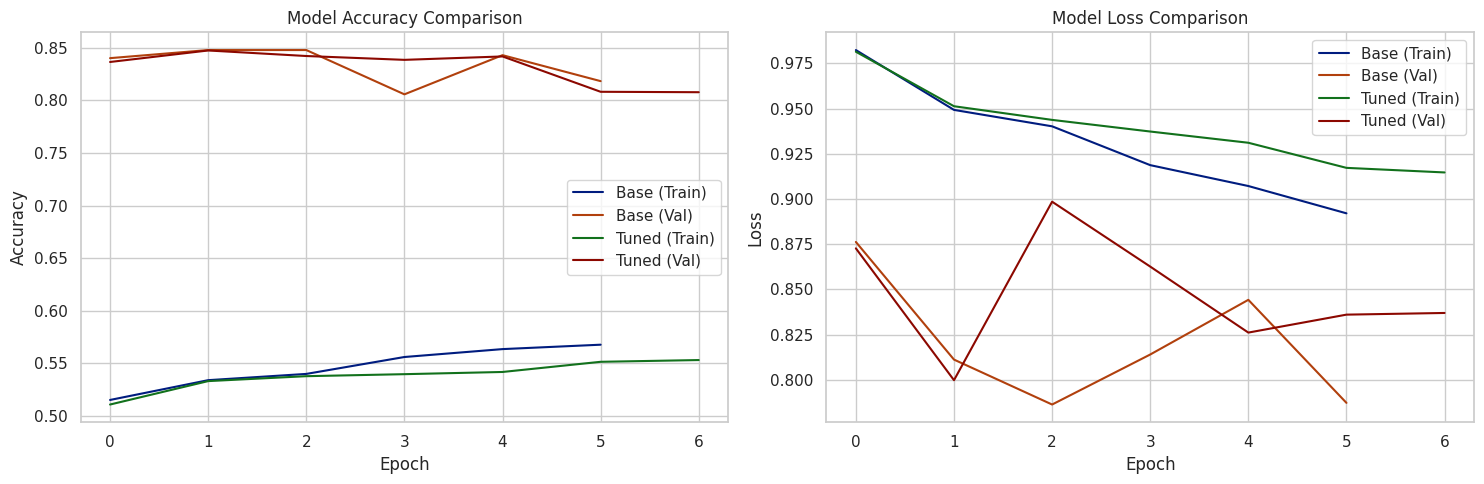


Generating confusion matrix visualizations...


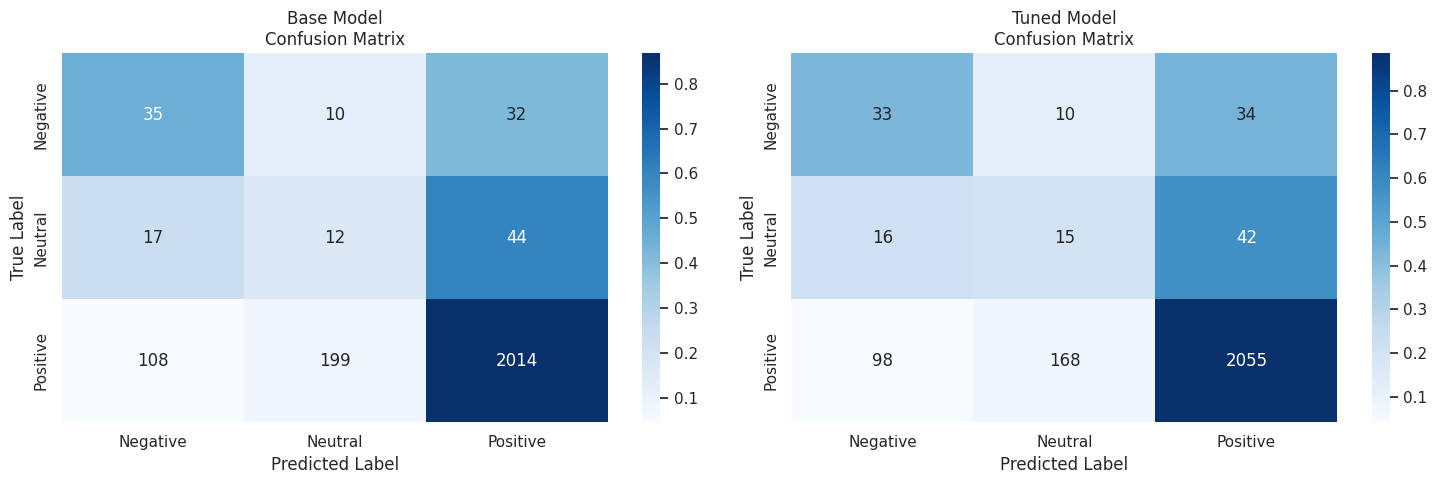


Generating comprehensive evaluation report...

Evaluation report generated successfully!
Report saved to: ../reports/figures/Task_3//evaluation_report.txt

Evaluation completed!
All evaluation artifacts saved to: ../reports/figures/Task_3/


In [48]:
# 1. Load models and histories
print("Loading models and training histories...")
models, histories = load_models_and_histories()

# 2. Evaluate models
print("\nEvaluating models on test set...")
metrics = {}
for model_name, model in models.items():
    metrics[model_name] = evaluate_model_performance(
        model,
        X_test,
        y_test,
        model_name
    )

# 3. Compare training histories
print("\nComparing training histories...")
compare_training_histories(histories, FIGURE_PATH)

# 4. Visualize confusion matrices
print("\nGenerating confusion matrix visualizations...")
visualize_confusion_matrices(metrics, FIGURE_PATH)

# 5. Generate evaluation report
print("\nGenerating comprehensive evaluation report...")
generate_evaluation_report(metrics, FIGURE_PATH)

print("\nEvaluation completed!")
print(f"All evaluation artifacts saved to: {FIGURE_PATH}")